# Instructions

When setting up this workflow, do the following:`
·         Use an 80/20 training/test dataset split (recall we use the Data Sampler Widget for this).

·         Use the following 2 ML algorithms to train the ML model and make a prediction for the housing prices.

o    Linear Regression

o    Decision Tree - just use the default tree options here. 

·         Use 5-fold cross validation for testing in the Test & Score Widget.

·         Setup a flow to the Predictions Widget using the test data you created with the 80/20 split.

## Requirements

In [21]:
%pip install gdown
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 69.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Downloading data

In [1]:
import gdown

url = 'https://drive.google.com/uc?id=11ys27Wa85vrEYv6r59JznLtXesW6CGc1' # google drive link housing the data
output = 'data/housing_data.csv'

gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=11ys27Wa85vrEYv6r59JznLtXesW6CGc1
To: /home/marco/house_regression/data/housing_data.csv
100%|██████████| 622/622 [00:00<00:00, 1.96MB/s]


'data/housing_data.csv'

## Formatting dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
# Read the dataset
data = pd.read_csv(output)
data

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900
5,1985,299900
6,1534,314900
7,1427,198999
8,1380,212000
9,1494,242500


In [37]:
# function for splitting the data
def data_split(data):
    x = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    return {'x': x_train, 'y': y_train},{'x':x_test, 'y':y_test}

In [39]:
train, test = data_split(data)

In [40]:
f"training size x: {len(train['x'])}, training size_y: {len(train['y'])}"

'training size x: 37, training size_y: 37'

In [41]:
f"testing size x: {len(test['x'])}, testing size y: {len(test['y'])}"

'testing size x: 10, testing size y: 10'

## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [42]:
column_labels = data.columns.tolist()
column_labels

['Size', 'Price']

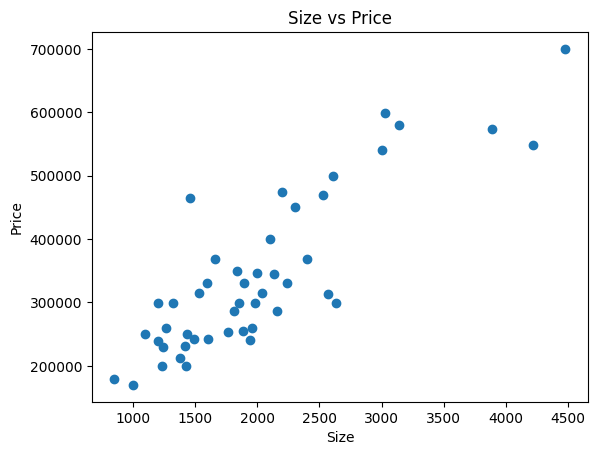

In [43]:

#plotting the total data
x_points = data['Size'].to_numpy()
y_points = data['Price'].to_numpy()
plt.scatter(x_points, y_points)  


plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')
plt.show()  

In [46]:
# Training the model
regressor = LinearRegression()
regressor.fit(train['x'], train['y'])
y_predictions = regressor.predict(test['x'])
print('Predictions:', y_predictions)
# get the coefficients and intercept
print("Coefficients:\n", regressor.coef_)
print('Intercept:\n', regressor.intercept_)


Predictions: [362157.6902483  479377.41576841 316996.19514397 462238.56582577
 413324.03788728 337137.47135393 408069.79191946 212036.3768821
 287597.43794309 329631.40568562]
Coefficients:
 [125.10109447]
Intercept:
 86935.28241026553


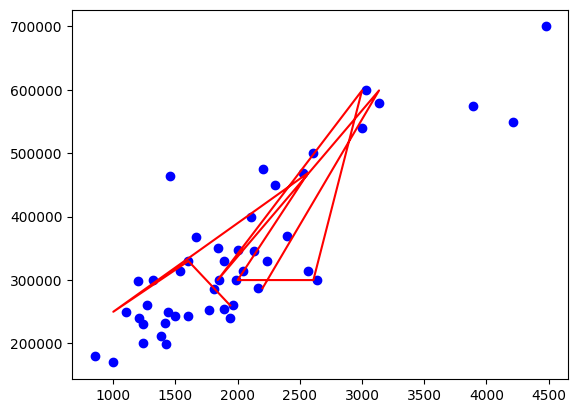

In [81]:
# Visualizing the linear regression line

plt.scatter(x_points, y_points, color='blue', label='Data')
plt.plot(test['x'], y_predictions, color='red', label='Regression line')

plt.show()



In [131]:
# 5 Fold Validation

kf = KFold(n_splits=5)
scores = cross_val_score(regressor, train['x'], train['y'], cv=kf)
print("Cross-val scores:", scores)
print("Mean accuracy:", scores.mean())

mse = mean_squared_error(test['y'], y_predictions)
f'mse: {mse}'

Cross-val scores: [-0.69748259  0.87826684  0.80906142  0.84935479  0.7540365 ]
Mean accuracy: 0.518647392510748


'mse: 12234928940.5'

## Decision Tree

In [54]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [55]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(train['x'], train['y'])

DecisionTreeRegressor()

In [82]:
#testing the model
y_predictions = tree_regressor.predict(test['x'])
y_predictions

array([287000., 599000., 299900., 599000., 299900., 299900., 469000.,
       249900., 329900., 259900.])

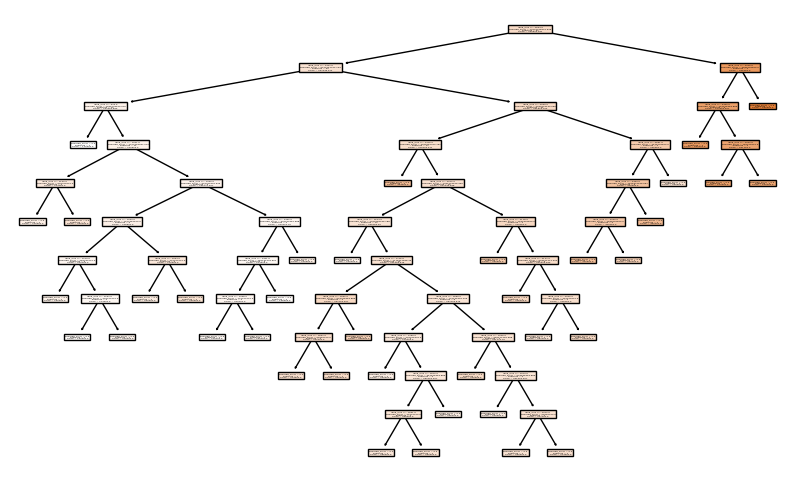

In [64]:
# Visualizing the data

plt.figure(figsize=(10, 6))
plot_tree(tree_regressor, filled=True, feature_names=['land_size'], class_names=['price'])

plt.savefig('tree.svg') # saves a high quality tree
plt.show()

In [155]:
# 5 Fold Validation
#awful results
kf = KFold(n_splits=5)
scores = cross_val_score(tree_regressor, train['x'], train['y'], cv=kf)
print("Cross-val scores:", scores)
print("Mean accuracy:", scores.mean())

mse = mean_squared_error(test['y'], y_predictions)
f'mse: {mse}'

Cross-val scores: [-3.10475702  0.72390209  0.63069947  0.83745715 -0.24064325]
Mean accuracy: -0.23066831153616377


'mse: 12234928940.5'